# sFC-Demo

Static Functional Connectivity (sFC) demonstration to scaffold later analysis pipelines.

# Imports

In [14]:
from utils import FuncData
from nilearn.connectome import ConnectivityMeasure
from nilearn.plotting import plot_matrix
import numpy as np
import matplotlib.pyplot as plt

# Generate some data with `FuncData`

In [42]:
# number of voxel-pair correlations
n_corrs = 7

# custom correlations to artifically generate
pearsons_r = list(np.linspace(0.89, 0.99, n_corrs))

In [43]:
# create FuncData instance
fc_data = FuncData(size=(30, 500), n_corrs=n_corrs, pearsons_r=pearsons_r)

In [44]:
# create data
my_data = fc_data.create_data()

Text(0.5, 1.0, "Pearson's r")

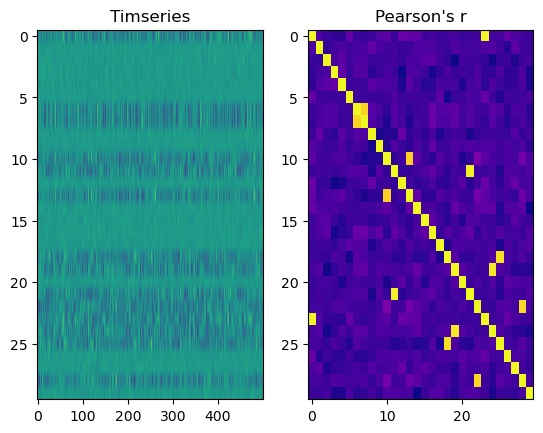

In [45]:
# plot
fix, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(my_data.data, aspect='auto')
ax[0].set_title('Timseries')

ax[1].imshow(np.corrcoef(my_data.data), aspect='auto', cmap='plasma')
ax[1].set_title("Pearson's r")

In [46]:
# show some info about the data
print(my_data.voxel_info)
print()
print(my_data.vox_pairs)
print()
print(my_data.pearsons_r)

{(10, 13): 0.89, (6, 7): 0.9066666666666667, (22, 28): 0.9233333333333333, (18, 25): 0.94, (19, 24): 0.9566666666666667, (11, 21): 0.9733333333333334, (0, 23): 0.99}

[(10, 13), (6, 7), (22, 28), (18, 25), (19, 24), (11, 21), (0, 23)]

[0.89, 0.9066666666666667, 0.9233333333333333, 0.94, 0.9566666666666667, 0.9733333333333334, 0.99]


> In the above output of `my_data.voxel_info`, a `dict` contains the `my_data.voxel_pairs` as keys and `my_data.pearsons_r`.

> Now you know the "ground truth" correlations for some voxel pairs.

# Calculate pairwise correlations

In [52]:
# generate correlation matrix
correlation_measure = ConnectivityMeasure(
    kind="correlation",
    standardize="zscore_sample",
)
correlation_matrix = correlation_measure.fit_transform([my_data.data.T])[0]

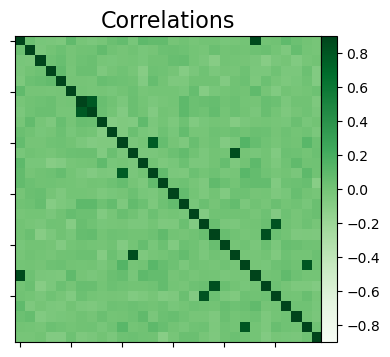

In [53]:
# plot
plot_matrix(
    correlation_matrix,
    figure=(4, 8),
    vmax=0.9,
    vmin=-0.9,
    title="Correlations",
    cmap='Greens'
);